# 모두를 위한 딥러닝
## Lab-07-2 Meet MNIST Dataset

In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

tf.compat.v1.set_random_seed(777)  # for reproducibility

### Reading data and set variables

In [71]:
# MNIST Dataset Setting

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [72]:
# 출력이 숫자 0~9, 총 10개의 숫자를 구분하는 것이니 nb_classes = 10
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784

X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, nb_classes])

# MNIST data X의 shape가 [,784]이므로 XW = b 에서 W.shape = [784, nb_classes]
W = tf.Variable(tf.random.normal([784, nb_classes]))
b = tf.Variable(tf.random.normal([nb_classes]))

### Softmax function = Hypothesis
$$
S(y_i)=\frac{e^{y_i}}{\sum_{j}e^{y_i}}$$

**Softmax func은 Hypothesis가 되고**, 그 출력값은 0~1 범위 내의 값이고, 모든 출력값의 합은 1이다. 즉 각각을 확률로 볼 수 있다는 말이다.

그렇다면 **Cost function**은 어떻게 될까?

$$
CROSS-ENTROPY: D(S, L) = -\sum_{i}L_{i}log(S_i)\\
이때, S는\ Softmax func의\ 출력값\ S(y)=\bar{y}이고\ L은\ 결과값\ Y이다.$$

softmax func을 hypothesis로 받아 구하는 cost function을 **Cross-entropy**라고 한다.

In [73]:
# Hypothesis using softmax function

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

# Cost

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(hypothesis), axis=1))

# Gradient descent

train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [74]:
# Test model

# Y (labels)과 hypothesis의 각 행에서 가장 큰 값이 같은지 비교.
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

* tf.argmax

행렬 A가 2차원 배열일 때, 최대 Index 수 = rank = 2로,\
**tf.argmax(A,0)**은 2차원 배열의 **각 열에서** 가장 큰 값을 찾아 **인덱스를 반환**한다.\
**tf.argmax(A,1)**은 2차원 배열의 **각 행에서** 가장 큰 값을 찾아 **인덱스를 반환**한다.

### Training epoch & batch

In [75]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

* **epoch**\
= one forward pass and one backward pass of all the training examples

* **batch size**\
= the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need

* **number of iterations**\
= number of passes, each pass using [batch sie] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Epoch: 0001, Cost: 2.659803869
Epoch: 0002, Cost: 1.058210353
Epoch: 0003, Cost: 0.836368982
Epoch: 0004, Cost: 0.727535176
Epoch: 0005, Cost: 0.659685686
Epoch: 0006, Cost: 0.611511747
Epoch: 0007, Cost: 0.575702926
Epoch: 0008, Cost: 0.548183695
Epoch: 0009, Cost: 0.525436045
Epoch: 0010, Cost: 0.506575538
Epoch: 0011, Cost: 0.490068723
Epoch: 0012, Cost: 0.476990278
Epoch: 0013, Cost: 0.464764345
Epoch: 0014, Cost: 0.454043312
Epoch: 0015, Cost: 0.444558110
Learning finished
Accuracy:  0.8915
Label:  [8]
Prediction:  [8]


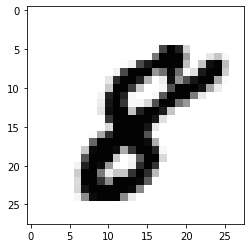

In [80]:
with tf.Session() as sess:
    
    # Initialize TensorFlow variables
    sess.run(tf.compat.v1.global_variables_initializer())
    
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c_, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")
    
    # Test the model using test sets
    print(
        "Accuracy: ", 
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    
### Sample image show and prediction

    # Get one and predict
    
    # 랜덤하게 데이터를 하나 가져온다.
    r = random.randint(0, mnist.test.num_examples - 1)
    
    # 읽어온 labels의 argmax index를 뽑는다.
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        
        # 그 index와 hypothesis를 통해 예상한 값과 비교.
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )
    
    # 따온 이미지를 출력
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()